In [1]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("C:\\Users\\skalk\\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [5]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
df=df.dropna()

<AxesSubplot:>

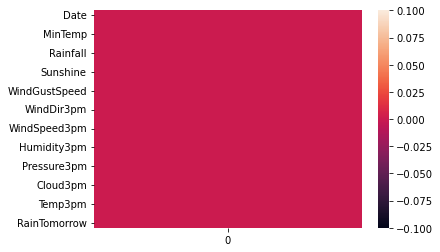

In [7]:
sns.heatmap(df.isnull().sum().to_frame())

In [10]:
#remove unwanted columns
unwanted_columns=['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Pressure9am','Pressure3pm','Humidity9am','Humidity3pm','WindGustSpeed','WindGustDir','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm']
df=df.drop(unwanted_columns,axis=1)

In [11]:
df=df.drop('Location',axis=1)

In [12]:
#split the data
x=df.drop(['RainTomorrow','RainToday'],axis=1)
y=df['RainTomorrow']

In [13]:
#split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
#build and train the model to predict whether it will rain tomorrow
classifier=RandomForestClassifier()
classifier_param_grid={'n_estimators':[100,200,300],'max_depth':[None,5,10]}
classifier_grid_search=GridSearchCV(classifier,classifier_param_grid,cv=5)
classifier_grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [15]:
best_classifier=classifier_grid_search.best_estimator_

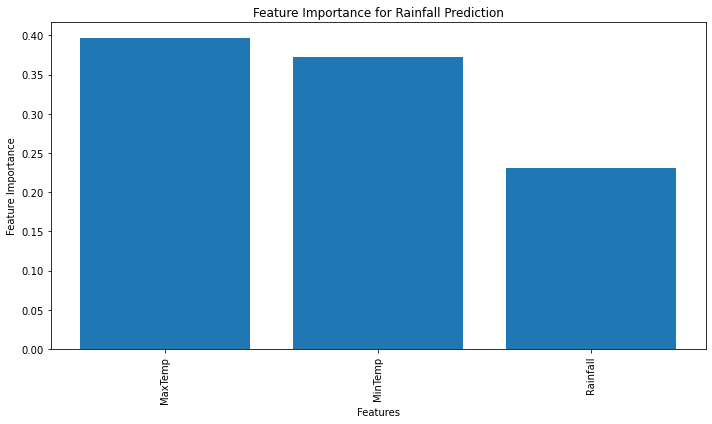

In [21]:
#Plot a graph between features and label
feature_names = x.columns

# Calculate the feature importance for the classification model
classifier_feature_importance = best_classifier.feature_importances_

# Sort the feature importance values in descending order
sorted_indices = classifier_feature_importance.argsort()[::-1]
sorted_importance = classifier_feature_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Plot the feature importance graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance for Rainfall Prediction")
plt.tight_layout()
plt.show()

In [22]:
y_pred_classifier=best_classifier.predict(x_test)

In [24]:
# Calculate accuracy for the classifier
classifier_accuracy = accuracy_score(y_test, y_pred_classifier)
print("Classifier Accuracy:", classifier_accuracy)


Classifier Accuracy: 0.8403693931398417


In [28]:
# Split the data into features (X) and labels (y)
X = df.drop(['Rainfall','RainToday','RainTomorrow'], axis=1)
Y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build and train the regression model to predict the amount of rainfall
regressor = RandomForestRegressor()

# Define the hyperparameter grid for the regressor
regressor_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

In [29]:
# Perform grid search with cross-validation for the regressor
regressor_grid_search= GridSearchCV(regressor, regressor_param_grid, cv=5)
regressor_grid_search.fit(X_train, Y_train)

# Get the best regressor
best_regressor = regressor_grid_search.best_estimator_

In [30]:
# Step 6: Predicting the Amount of Rainfall
# Predict using the best regressor
y_pred = best_regressor.predict(X_test)

# Display the predicted amount of rainfall
print("Predicted Amount of rainfall:",y_pred)

Predicted Amount of rainfall: [ 1.77824555  0.44735168  2.36646116  5.13642385  0.13360898  0.44710566
  1.57384032  0.34731689  0.17463823  5.99789528  2.64578213  0.12281209
  1.30635926  1.87267214  0.68947078  0.66154065  4.04074036  1.39303983
  5.29825465  3.23317457  3.59294493  5.67102819  2.88852929  3.88593011
  0.78334953  6.18949683  5.57757293  3.14150023  1.6953025   0.10687821
  2.78363764  2.21676528  3.61547926  1.40936463  0.22503186  0.08591654
  2.77687845 10.72950483  0.52997852  2.2261181   0.44712918  5.63242251
  0.05755205  1.49201089  1.3346873   0.11875948  6.56971564  4.56713529
  2.31722749  0.3667076   1.31320328  0.8588311   7.17616062  1.09884901
  2.75143083  0.12027814  0.91755188  0.20829349  1.73783963  5.81982657
  2.73669143  2.3004877   6.65397554  3.70773325  4.21239838  2.73987839
  1.35755897  0.50854236  0.0785472   3.31250688  2.74669398  3.79231806
  1.03088741  0.96033985  2.69325546  0.03459411  0.71297053  0.36032133
  2.74669398  0.16312